In [1]:
#pip uninstall scikit-learn --yes
#pip uninstall imblearn --yes
#pip install scikit-learn==1.2.0
#pip install scikit-optimize
#pip install hyperopt==0.2.7
#pip install imblearn
#pip install scikit-plot
#pip install -r requirements.txt

# Pacotes

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np
from datetime import date
from pytz import timezone

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
plt.style.use('ggplot')

# Machine Learning - Pré-processamento
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler
)
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
)
from sklearn.pipeline import Pipeline

# Machine Learning - Modelos e Métricas
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, roc_auc_score, 
    recall_score, precision_score, log_loss, average_precision_score,
    roc_curve, precision_recall_curve, balanced_accuracy_score,
    matthews_corrcoef, cohen_kappa_score, brier_score_loss
)

# Modelos e otimização
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance, plot_tree
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from hyperopt.pyll.base import scope
import shap
from skopt import forest_minimize
import catboost as ctb
from catboost import CatBoostClassifier

# Balanceamento de classes
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Estatística
from scipy.stats import ks_2samp

# Outras ferramentas
import re

# Verificações de versão
print(f"xgboost: {xgb.__version__}")
print(f"shap: {shap.__version__}")
#print(f"sklearn: {sklearn.__version__}")

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score


import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_recall_fscore_support, 
    roc_auc_score, average_precision_score, matthews_corrcoef, log_loss, 
    brier_score_loss, cohen_kappa_score, balanced_accuracy_score,
)
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
import catboost as ctb
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import numpy as np
import pandas as pd

from hyperopt import STATUS_OK, hp
from sklearn.model_selection import StratifiedKFold, cross_validate
import catboost as ctb
import pandas as pd

from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier

# Bibliotecas padrão e de manipulação de data
from datetime import date
import pandas as pd
import numpy as np
from pytz import timezone

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# Machine Learning - pré-processamento e métricas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, recall_score, precision_score, log_loss, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

# Machine Learning - modelos e otimização
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
import sklearn
import shap
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from skopt import forest_minimize
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Outras bibliotecas
import re

plt.style.use('ggplot')
print(xgb.__version__)
print(shap.__version__)
print(sklearn.__version__)
#print(hyperopt.__version__)

from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

xgboost: 2.0.2
shap: 0.44.0
2.0.2
0.44.0
1.4.2


# Funções

In [2]:
## Dummies
def get_one_hot_enc(feature_col: pd.Series, enc: preprocessing.OneHotEncoder, column_name: str) -> pd.DataFrame:
    """
    Aplica codificação one-hot a uma coluna específica de um DataFrame.

    Args:
    feature_col (pd.Series): Coluna do DataFrame para ser codificada.
    enc (preprocessing.OneHotEncoder): Instância do OneHotEncoder treinada.
    column_name (str): Nome da coluna a ser codificada.

    Processo:
    1. Cria um DataFrame com a coluna especificada.
    2. Aplica a transformação one-hot usando o encoder fornecido.
    3. Retorna um DataFrame com as colunas codificadas.

    Returns:
    pd.DataFrame: DataFrame com as colunas resultantes da codificação one-hot.
    """
    unseen_df = pd.DataFrame(feature_col, columns=[column_name])
    encoded_vec = enc.transform(unseen_df).toarray()
    columns = enc.get_feature_names_out([column_name])
    encoded_df = pd.DataFrame(encoded_vec, columns=columns)
    return encoded_df


# Função para salvar um modelo em um arquivo pickle
def save_pickle(model, file_name: str):
    """
    Salva um objeto modelo em um arquivo pickle.

    Args:
    model (any): O modelo a ser salvo.
    file_name (str): Nome do arquivo pickle a ser criado.

    Processo:
    1. Abre o arquivo pickle em modo de escrita binária.
    2. Salva o objeto modelo no arquivo pickle.
    """
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)

# Função para carregar um modelo de um arquivo pickle
def load_pickle(file_name: str) -> any:
    """
    Carrega um objeto a partir de um arquivo pickle.

    Args:
    file_name (str): Nome do arquivo pickle a ser carregado.

    Processo:
    1. Abre o arquivo pickle em modo de leitura binária.
    2. Carrega e retorna o objeto contido no arquivo pickle.

    Returns:
    any: Objeto carregado do arquivo pickle.
    """
    with open(file_name, 'rb') as file:
        return pickle.load(file)

# Dataset

In [3]:
file_path = 'df_treinamento_modelo.csv'
df = pd.read_csv(file_path)

df = df.drop(columns =[ 'codigo_di', 'codigo_tipo_linha'])

df = df[list(df)]

list_dummies =  colunas_categ = df.drop(columns = 'status_do_voo').select_dtypes(include=['object']).columns.tolist()

# Transformar colunas categóricas em tipo "category"
df[list_dummies] = df[list_dummies].astype("category")

# Seleção das features preditoras (X) e variável-alvo (y)
dt_ax = df.drop(columns=["status_do_voo"])
dt_ay = df[['status_do_voo']]

# Codificação da variável-alvo
label_mapping = {'Pontual': 0, 'Atrasado': 1}
dt_ay = dt_ay['status_do_voo'].map(label_mapping)

# Codifica colunas categóricas como inteiros
label_encoders = {}
for col in list_dummies:
    le = LabelEncoder()
    dt_ax[col] = le.fit_transform(dt_ax[col])
    label_encoders[col] = le

# Segmentação em treino (85%) e teste (15%)
X_train, X_test, y_train, y_test = train_test_split(dt_ax, dt_ay, random_state=12, test_size=0.18)

#smote = SMOTE(random_state=42, sampling_strategy='not majority')
#X_smote_a, y_smote_a = smote.fit_resample(X_train, y_train)

# Segmentação adicional para calibração (80% treino / 20% calibração)
X_train_calib, X_test_calib, y_train_calib, y_test_calib = train_test_split(X_train, y_train, random_state=12, test_size=0.12)

smote = SMOTE(random_state=42, sampling_strategy='not majority')
X_smote_a, y_smote_a = smote.fit_resample(X_train_calib, y_train_calib)

# Reverter os valores transformados para o tipo "category" original
def revert_to_category(data, label_encoders, list_dummies):
    for col in list_dummies:
        if col in data.columns:
            le = label_encoders[col]
            data[col] = le.inverse_transform(data[col])
    return data

# Aplicar a reversão em X_smote_a, X_test_calib, X_test
X_smote_a = revert_to_category(X_smote_a, label_encoders, list_dummies)
X_test_calib = revert_to_category(X_test_calib, label_encoders, list_dummies)
X_test = revert_to_category(X_test, label_encoders, list_dummies)

# Para garantir que as colunas estão no tipo "category"
X_smote_a[list_dummies] = X_smote_a[list_dummies].astype("category")
X_test_calib[list_dummies] = X_test_calib[list_dummies].astype("category")
X_test[list_dummies] = X_test[list_dummies].astype("category")

# Converte os nomes das colunas para uma lista de strings
feature_names = list(X_test.columns)

smote = RandomUnderSampler(random_state=42, sampling_strategy=0.67)
X_smote_under, y_smote_under = smote.fit_resample(X_test_calib, y_test_calib)

# Converte os conjuntos para DMatrix
dtrain_calib = xgb.DMatrix(X_smote_a, label=y_smote_a, enable_categorical=True, feature_names=feature_names, nthread=-1)
dtest_calib = xgb.DMatrix(X_smote_under, label=y_smote_under, enable_categorical=True, feature_names=feature_names, nthread=-1)

# Converte os conjuntos para DMatrix
#dtrain = xgb.DMatrix(X_smote_a, label=y_smote_a, enable_categorical=True, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True, feature_names=feature_names, nthread=-1)

In [4]:
def print_class_distribution(y, label):
    unique, counts = np.unique(y, return_counts=True)
    distribution = dict(zip(unique, counts))
    total = sum(counts)
    print(f'Distribuição de classes {label}:')
    for k, v in distribution.items():
        print(f'Classe {k}: {v/total:.2%}')
    print('--------------------')

print_class_distribution(y_train, 'original')
print_class_distribution(y_smote_a, 'SMOTE')

Distribuição de classes original:
Classe 0: 82.92%
Classe 1: 17.08%
--------------------
Distribuição de classes SMOTE:
Classe 0: 50.00%
Classe 1: 50.00%
--------------------


In [5]:
print_class_distribution(y_test_calib, 'original calib')
print_class_distribution(y_smote_under, 'Undersamp calib')

Distribuição de classes original calib:
Classe 0: 82.90%
Classe 1: 17.10%
--------------------
Distribuição de classes Undersamp calib:
Classe 0: 59.88%
Classe 1: 40.12%
--------------------


# Hipertunnig

In [6]:
def hipertunnig(space):
    """
    Realiza o ajuste de hiperparâmetros de um modelo XGBoost usando validação cruzada com DMatrix.
    
    Args:
    space (dict): Dicionário contendo os hiperparâmetros avaliados pelo Hyperopt.
    
    Returns:
    dict: Dicionário contendo o 'loss' (negativo da média do AUCPR), o 'status' e as métricas adicionais (AUC).
    """
    # Configuração do modelo com os parâmetros do espaço
    params = {
        'max_depth': int(space['max_depth']),
        'gamma': space['gamma'],
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'min_child_weight': int(space['min_child_weight']),
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'max_delta_step': space['max_delta_step'],
        'subsample': space['subsample'],
        'sampling_method': space['sampling_method'],
        'tree_method': space['tree_method'],       
        'device': space['device'], 
        'enable_categorical': space['enable_categorical'],
        'scale_pos_weight': space['scale_pos_weight'],
        'eval_metric': ["aucpr", "auc"],  # Avalia AUCPR e AUC
        'objective': space['objective'],
        'seed': space['seed'],
        'random_state': space['seed'],
        'max_cat_to_onehot': int(space['max_cat_to_onehot']),
        'max_cat_threshold': int(space['max_cat_threshold']),  
        'validate_parameters': space['validate_parameters']
    }

    # Realiza a validação cruzada com xgb.cv
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain_calib,                  # DMatrix preparado
        num_boost_round=int(space['n_estimators']),
        nfold=5,                              # Número de folds
        metrics=["aucpr", "auc"],             # Métricas de avaliação
        as_pandas=True,                       # Retorna os resultados como DataFrame
        seed=42,
        stratified=True,                      # Garante estratificação
        early_stopping_rounds = 10,           # Ativa a parada antecipada
    )
    
    # Calcula a média do AUCPR e do AUC
    mean_aucpr = cv_results["test-aucpr-mean"].max()
    mean_auc = cv_results["test-auc-mean"].max()
    print("Média AUCPR: ", mean_aucpr)
    print("Média AUC: ", mean_auc)

    # Retorna os resultados
    return {
        'loss': -mean_aucpr,   # Usa o negativo do AUCPR como função de perda
        'status': STATUS_OK,
        'additional_metrics': {
            'aucpr': mean_aucpr,
            'auc': mean_auc}}

# Espaço de busca atualizado
space = {
    'max_depth': scope.int(hp.quniform("max_depth", 1, 15, 1)),
    'gamma': hp.uniform('gamma', 1, 20),
    'reg_alpha': scope.int(hp.quniform('reg_alpha', 0, 200, 1)),
    'reg_lambda': hp.uniform('reg_lambda', 0, 10),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
    'min_child_weight': scope.int(hp.quniform('min_child_weight', 0, 20, 1)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 1000, 10)),
    'max_delta_step': hp.uniform('max_delta_step', 0, 10),
    'subsample': hp.uniform('subsample', 0.3, 1),
    'sampling_method': 'gradient_based',
    'tree_method': 'hist',
    'device': 'cuda',
    'enable_categorical': True,
    'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 30),
    'max_cat_to_onehot': scope.int(hp.quniform('max_cat_to_onehot', 3, 50, 1)),
    'max_cat_threshold': scope.int(hp.quniform('max_cat_threshold', 3, 50, 1)),
    'validate_parameters': True,
    'seed': 0,
    'objective': 'binary:logistic'
}

In [7]:
# Executando a otimização
trials = Trials()
best_hyperparams = fmin(fn=hipertunnig, 
                        space=space, 
                        algo=tpe.suggest, 
                        max_evals=15, 
                        trials=trials)

# Obtendo os melhores hiperparâmetros
best_hyperparams = space_eval(space, best_hyperparams)
print("Melhores hiperparâmetros:", best_hyperparams)

  0%|                                                                           | 0/15 [00:00<?, ?trial/s, best loss=?]

[20:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9540357765161704                                                                                                     
Média AUC:                                                                                                             
0.9374127708983266                                                                                                     
  7%|███▏                                            | 1/15 [00:30<07:00, 30.02s/trial, best loss: -0.9540357765161704]

[20:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9549729401009325                                                                                                     
Média AUC:                                                                                                             
0.9389628669074094                                                                                                     
 13%|██████▍                                         | 2/15 [01:25<09:47, 45.23s/trial, best loss: -0.9549729401009325]

[20:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.8873987361636047                                                                                                     
Média AUC:                                                                                                             
0.8753413434558469                                                                                                     
 20%|█████████▌                                      | 3/15 [01:33<05:37, 28.09s/trial, best loss: -0.9549729401009325]

[20:16:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.7461462624673867                                                                                                     
Média AUC:                                                                                                             
0.7598163560637827                                                                                                     
 27%|████████████▊                                   | 4/15 [02:05<05:23, 29.40s/trial, best loss: -0.9549729401009325]

[20:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9554279268314827                                                                                                     
Média AUC:                                                                                                             
0.9398536397809167                                                                                                     
 33%|████████████████                                | 5/15 [04:29<11:49, 70.99s/trial, best loss: -0.9554279268314827]

[20:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9579823532628626                                                                                                     
Média AUC:                                                                                                             
0.9437131310580528                                                                                                     
 40%|███████████████████▏                            | 6/15 [05:42<10:45, 71.71s/trial, best loss: -0.9579823532628626]

[20:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9544949382545278                                                                                                     
Média AUC:                                                                                                             
0.9380843181794054                                                                                                     
 47%|██████████████████████▍                         | 7/15 [06:04<07:22, 55.33s/trial, best loss: -0.9579823532628626]

[20:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9315442118632534                                                                                                     
Média AUC:                                                                                                             
0.9124078558786405                                                                                                     
 53%|█████████████████████████▌                      | 8/15 [06:15<04:49, 41.37s/trial, best loss: -0.9579823532628626]

[20:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9548546327654706                                                                                                     
Média AUC:                                                                                                             
0.9383026824069196                                                                                                     
 60%|████████████████████████████▊                   | 9/15 [06:30<03:17, 32.88s/trial, best loss: -0.9579823532628626]

[20:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9545046043191835                                                                                                     
Média AUC:                                                                                                             
0.9384785631429974                                                                                                     
 67%|███████████████████████████████▎               | 10/15 [07:27<03:22, 40.50s/trial, best loss: -0.9579823532628626]

[20:22:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:22:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.8903099711649736                                                                                                     
Média AUC:                                                                                                             
0.8739722750906648                                                                                                     
 73%|██████████████████████████████████▍            | 11/15 [08:27<03:05, 46.45s/trial, best loss: -0.9579823532628626]

[20:23:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:23:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.845903357748419                                                                                                      
Média AUC:                                                                                                             
0.8388254618593788                                                                                                     
 80%|█████████████████████████████████████▌         | 12/15 [09:10<02:15, 45.30s/trial, best loss: -0.9579823532628626]

[20:23:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9551577576240206                                                                                                     
Média AUC:                                                                                                             
0.9390094350999865                                                                                                     
 87%|████████████████████████████████████████▋      | 13/15 [10:18<01:44, 52.10s/trial, best loss: -0.9579823532628626]

[20:24:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.


[20:24:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9543446790542541                                                                                                     
Média AUC:                                                                                                             
0.9379443019686233                                                                                                     
 93%|███████████████████████████████████████████▊   | 14/15 [10:52<00:46, 46.75s/trial, best loss: -0.9579823532628626]

[20:25:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.




Média AUCPR:                                                                                                           
0.9494233447254823                                                                                                     
Média AUC:                                                                                                             
0.9338391835257184                                                                                                     
100%|███████████████████████████████████████████████| 15/15 [11:09<00:00, 44.62s/trial, best loss: -0.9579823532628626]
Melhores hiperparâmetros: {'colsample_bytree': 0.8895983125151528, 'device': 'cuda', 'enable_categorical': True, 'gamma': 16.742237149293082, 'learning_rate': 0.10393484926262443, 'max_cat_threshold': 5, 'max_cat_to_onehot': 33, 'max_delta_step': 2.833518700130667, 'max_depth': 14, 'min_child_weight': 9, 'n_estimators': 500, 'objective': 'binary:logistic', 'reg_alpha': 14, 'reg_lambda': 7.60006460

In [8]:
best_hyperparams

{'colsample_bytree': 0.8895983125151528,
 'device': 'cuda',
 'enable_categorical': True,
 'gamma': 16.742237149293082,
 'learning_rate': 0.10393484926262443,
 'max_cat_threshold': 5,
 'max_cat_to_onehot': 33,
 'max_delta_step': 2.833518700130667,
 'max_depth': 14,
 'min_child_weight': 9,
 'n_estimators': 500,
 'objective': 'binary:logistic',
 'reg_alpha': 14,
 'reg_lambda': 7.6000646003571735,
 'sampling_method': 'gradient_based',
 'scale_pos_weight': 8.343277689662308,
 'seed': 0,
 'subsample': 0.905519972819852,
 'tree_method': 'hist',
 'validate_parameters': True}

In [9]:
# Melhores Parametros
print("Melhor max_depth:", best_hyperparams['max_depth'])
print("Melhor gamma:", best_hyperparams['gamma'])
print("Melhor reg_alpha:", best_hyperparams['reg_alpha'])
print("Melhor reg_lambda:", best_hyperparams['reg_lambda'])
print("Melhor colsample_bytree:", best_hyperparams['colsample_bytree'])
print("Melhor min_child_weight:", best_hyperparams['min_child_weight'])
print("Melhor learning_rate:", best_hyperparams['learning_rate'])
print("Melhor n_estimators:", best_hyperparams['n_estimators'])
print("Melhor max_delta_step:", best_hyperparams['max_delta_step'])
print("Melhor subsample:", best_hyperparams['subsample'])
print("Melhor sampling_method:", best_hyperparams['sampling_method'])
print("Melhor tree_method:", best_hyperparams['tree_method'])
print("Melhor scale_pos_weight:", best_hyperparams['scale_pos_weight'])

Melhor max_depth: 14
Melhor gamma: 16.742237149293082
Melhor reg_alpha: 14
Melhor reg_lambda: 7.6000646003571735
Melhor colsample_bytree: 0.8895983125151528
Melhor min_child_weight: 9
Melhor learning_rate: 0.10393484926262443
Melhor n_estimators: 500
Melhor max_delta_step: 2.833518700130667
Melhor subsample: 0.905519972819852
Melhor sampling_method: gradient_based
Melhor tree_method: hist
Melhor scale_pos_weight: 8.343277689662308


# Treinamento do Modelo

In [10]:
# Preparar os parâmetros do modelo
best_params = {
    'max_depth': int(best_hyperparams['max_depth']),               # Profundidade máxima da árvore
    'n_estimators': int(best_hyperparams['n_estimators']),         # Número de árvores (boost rounds)
    'reg_lambda': best_hyperparams['reg_lambda'],                  # Regularização L2
    'reg_alpha': best_hyperparams['reg_alpha'],                    # Regularização L1
    'gamma': best_hyperparams['gamma'],                            # Redução mínima da perda
    'min_child_weight': int(best_hyperparams['min_child_weight']), # Peso mínimo da folha
    'colsample_bytree': best_hyperparams['colsample_bytree'],      # Amostragem de colunas por árvore
    'learning_rate': best_hyperparams['learning_rate'],            # Taxa de aprendizado
    'max_delta_step': best_hyperparams['max_delta_step'],          # Passo máximo de atualização
    'subsample': best_hyperparams['subsample'],                    # Fração de amostras para cada árvore
    'sampling_method': best_hyperparams['sampling_method'],        # Método de amostragem (e.g., 'uniform' ou 'gradient_based')
    'tree_method': best_hyperparams['tree_method'],                # Método de crescimento da árvore ('hist', 'gpu_hist', etc.)
    'scale_pos_weight': best_hyperparams['scale_pos_weight'],      # Peso para classes desbalanceadas
    'max_cat_to_onehot': best_hyperparams['max_cat_to_onehot'],    # Número máximo de categorias para one-hot
    'max_cat_threshold': best_hyperparams.get('max_cat_threshold', 20), # Limite máximo de categorias (valor padrão incluído)
    'objective': 'binary:logistic',                                # Objetivo do modelo (logística binária)
    'eval_metric': ["aucpr", "auc"],                               # Métrica de avaliação padrão
    'enable_categorical': True,                                    # Suporte a variáveis categóricas
    'validate_parameters': True,                                   # Validação dos parâmetros
    'seed': best_hyperparams.get('seed', 0),                       # Semente para reprodutibilidade
    'random_state': best_hyperparams.get('random_state', 0),       # Estado aleatório
    'device': best_hyperparams.get('device', 'cuda'),              # Especifica o uso de GPU ('cuda' ou 'cpu')
    'verbosity': 1,                                                # Nível de logging do modelo
    'nthread': best_hyperparams.get('nthread', -1)                 # Número de threads para paralelismo
}

# Separar o número de iterações de boosting
num_boost_round = best_params.pop('n_estimators')  # Remove do dict e armazena separadamente

# Treinamento com early stopping
model_class = xgb.train(
    params=best_params,
    dtrain=dtrain_calib,
    num_boost_round=num_boost_round,
    evals=[(dtest, 'validation')],  # Adiciona o conjunto de validação
    early_stopping_rounds=15,       # Critério de parada
    verbose_eval=True               # Mostra o progresso durante o treinamento
)

[0]	validation-aucpr:0.22369	validation-auc:0.60475


[20:25:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical" } are not used.



[1]	validation-aucpr:0.23638	validation-auc:0.61696
[2]	validation-aucpr:0.24518	validation-auc:0.62632
[3]	validation-aucpr:0.24594	validation-auc:0.63116
[4]	validation-aucpr:0.24541	validation-auc:0.63322
[5]	validation-aucpr:0.24334	validation-auc:0.63154
[6]	validation-aucpr:0.24501	validation-auc:0.63368
[7]	validation-aucpr:0.24998	validation-auc:0.63862
[8]	validation-aucpr:0.25159	validation-auc:0.64227
[9]	validation-aucpr:0.25382	validation-auc:0.64386
[10]	validation-aucpr:0.25537	validation-auc:0.64608
[11]	validation-aucpr:0.25781	validation-auc:0.64784
[12]	validation-aucpr:0.25891	validation-auc:0.64966
[13]	validation-aucpr:0.25970	validation-auc:0.65129
[14]	validation-aucpr:0.26002	validation-auc:0.65248
[15]	validation-aucpr:0.26243	validation-auc:0.65433
[16]	validation-aucpr:0.26417	validation-auc:0.65552
[17]	validation-aucpr:0.26593	validation-auc:0.65686
[18]	validation-aucpr:0.26727	validation-auc:0.65790
[19]	validation-aucpr:0.26692	validation-auc:0.65784
[2

## Analise do Resultado

In [11]:
#file_path_x = 'df_xtest_hold.csv'
#X_test = pd.read_csv(file_path_x)

#file_path_y = 'df_ytest_hold.csv'
#y_test = pd.read_csv(file_path_y)

In [22]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Matriz de confusão e cálculos básicos
cm = confusion_matrix(y_test_np, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')


Accuracy: 0.309
Precision: 0.190
Recall: 0.950
F1-Score: 0.317
PRAUC: 0.320
AUC: 0.699
Gini Coefficient: 0.398
MCC: 0.132
Log Loss: 1.069
Brier Score: 0.401
Cohen's Kappa: 0.050
Balanced Accuracy: 0.564
Specificity: 0.179
False Positive Rate (FPR): 0.821
False Negative Rate (FNR): 0.050
Geometric Mean (G-Mean): 0.412


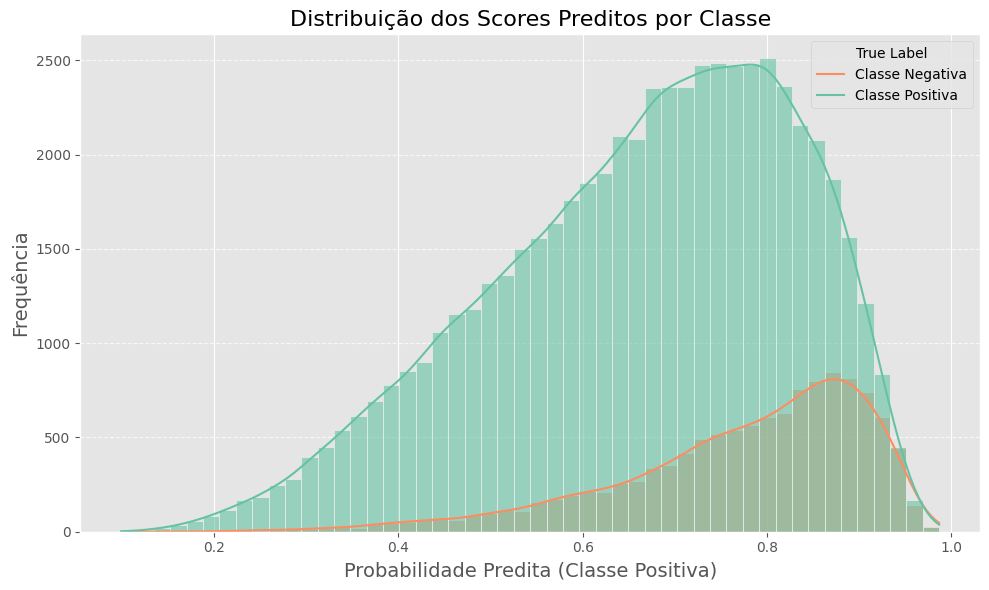

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que os dados de teste e as probabilidades preditas sejam arrays NumPy
# Supomos que y_test_np e y_pred_proba já estão definidos conforme descrito

# Criação de um DataFrame para facilitar a visualização
import pandas as pd

data = pd.DataFrame({
    'True Label': y_test_np,
    'Predicted Probability': y_pred_proba
})

# Plotando a distribuição dos scores preditos
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Predicted Probability', hue='True Label', kde=True, bins=50, palette='Set2', alpha=0.6)
plt.title('Distribuição dos Scores Preditos por Classe', fontsize=16)
plt.xlabel('Probabilidade Predita (Classe Positiva)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(title='True Label', labels=['Classe Negativa', 'Classe Positiva'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance

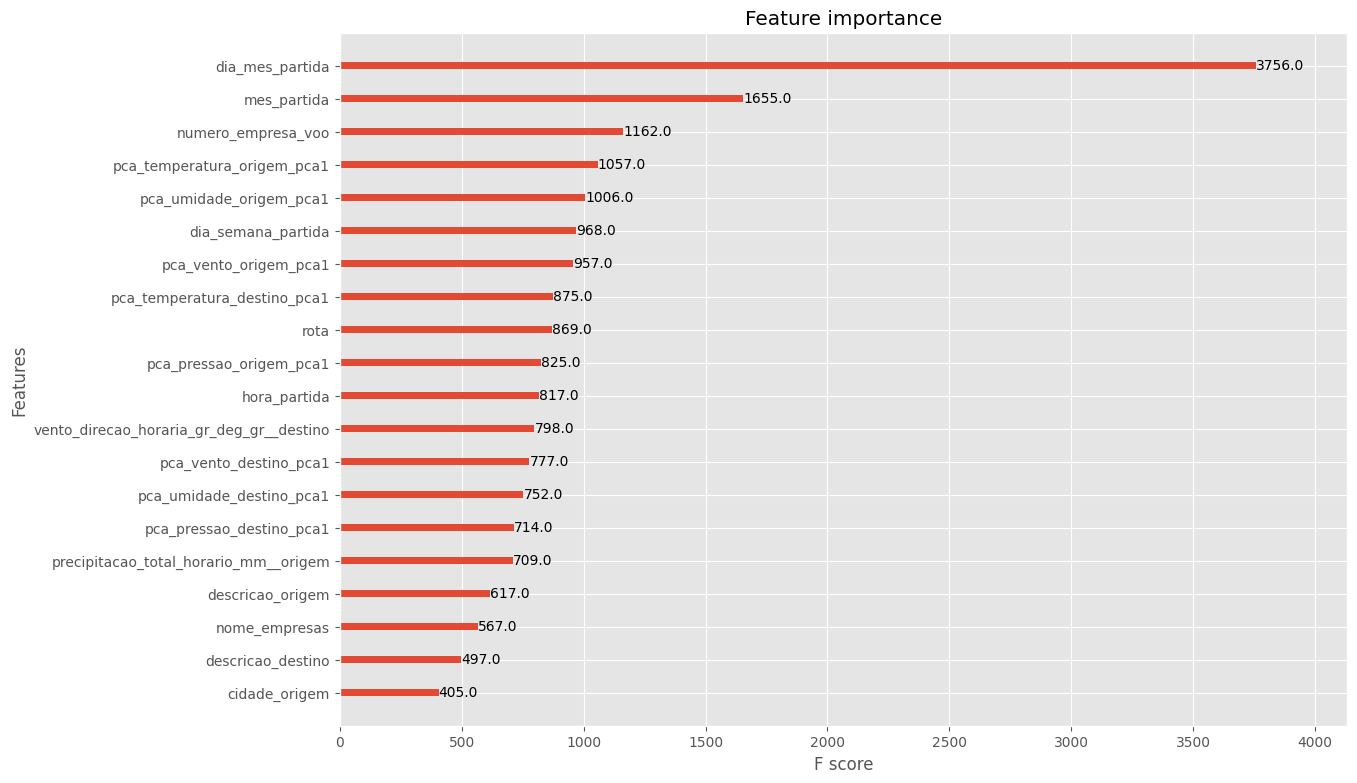

In [13]:
plt.rcParams['figure.figsize'] = [13, 9]
xgb.plot_importance(model_class, max_num_features=20)
plt.show()

#### Treeplot

In [14]:
# plot single tree
#fig, ax = plt.subplots(figsize=(100, 100))
#fig = plt.figure(figsize=(12, 6))
# plt.figure(figsize=(50, 50))
#plot_tree(model_class)
#plt.savefig('xgb_treeplot.jpg', dpi=1800)  
#plt.show()

### Matriz de Confusão

O gráfico de calor mostra as previsões do modelo em relação aos valores reais. Os valores na diagonal (7979 e 148171) representam as previsões corretas para as classes negativas (0) e positivas (1), respectivamente. Os outros dois valores (19805 e 18812) representam os erros do tipo I(falsos negativos) e tipo II(falsos positivos), respectivamente. A matriz sugere que o modelo é melhor em prever a classe majoritária (Pontual) do que a minoritária (Atraso), o que é comum em conjuntos de dados desbalanceados.

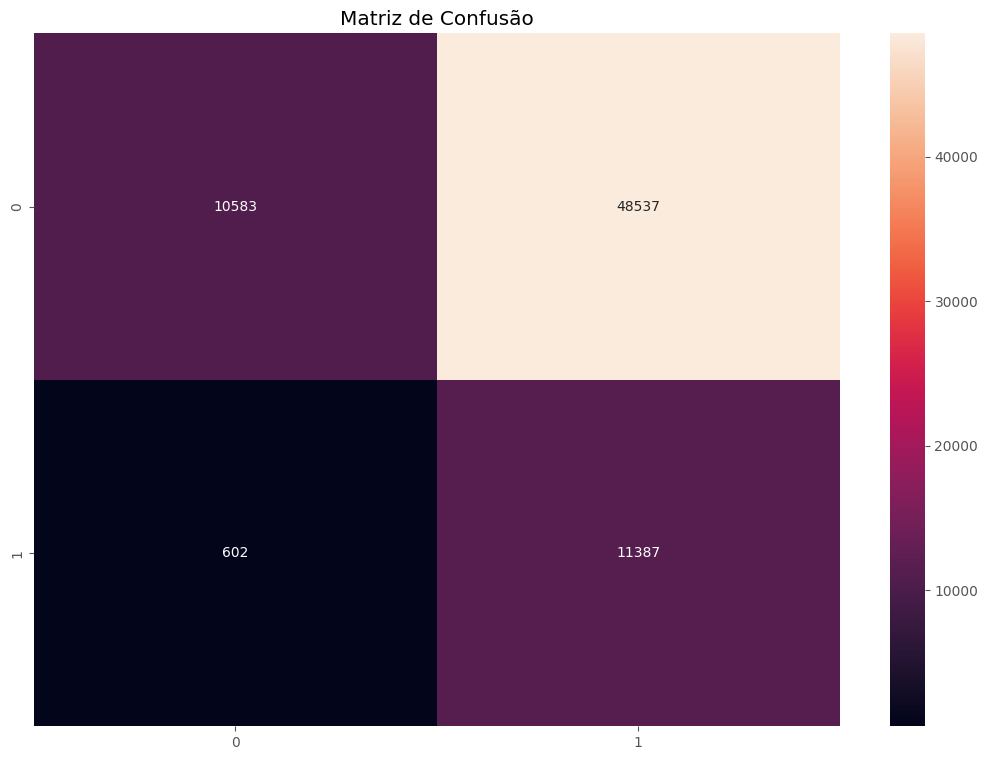

In [15]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.show()

### Curva ROC

A relação entre a taxa de verdadeiro positivo e a taxa de falso positivo para diferentes limiares de classificação. A curva está suave e sobe gradualmente. No entanto, uma curva ROC ideal se aproximaria mais do canto superior esquerdo mais rápido. A consequência é que temos uma alta taxa de verdadeiro positivo e baixa taxa de falso positivo. Isso devido ao banco de dados desbalanceado. O resultado nos permit dizer que ainda há um potencial de melhoria no modelo

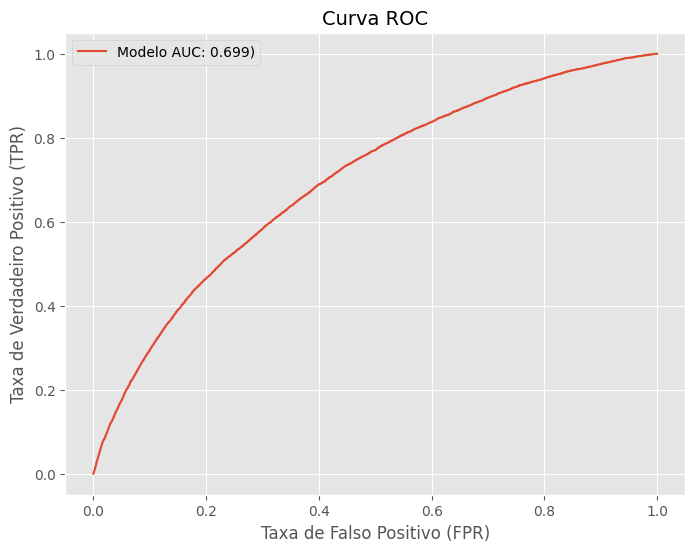

In [16]:
# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pos)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo AUC: {roc_auc_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()




### Curva de Precisão-Recall

Este gráfico é útil em situações de classes desbalanceadas e foca na relação entre precisão (quão muitos dos classificados como positivos são realmente positivos) e recall (quão muitos dos positivos reais foram capturados pelo modelo). A curva começa com uma alta precisão, mas diminui à medida que o recall aumenta, isso pode ser um sinal de que pode estar acontecendo um trade-off, ou seja, visando ter mais ou manter performance.

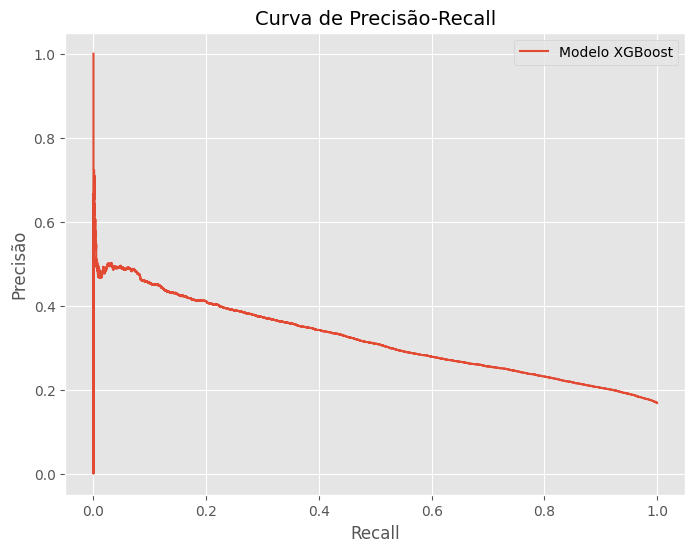

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

# Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_pos)

# Plot da Curva de Precisão-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Modelo XGBoost')
plt.title('Curva de Precisão-Recall', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


### Calibration plot


Before Calibration
--- Uncalibrated ---
Log Loss: 0.7092
AUC: 0.7345
Brier Score: 0.2552
Overconfidence Error: 0.2869
Expected Calibration Error (ECE): 0.3524
Maximum Calibration Error (MCE): 0.4398


[20:25:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



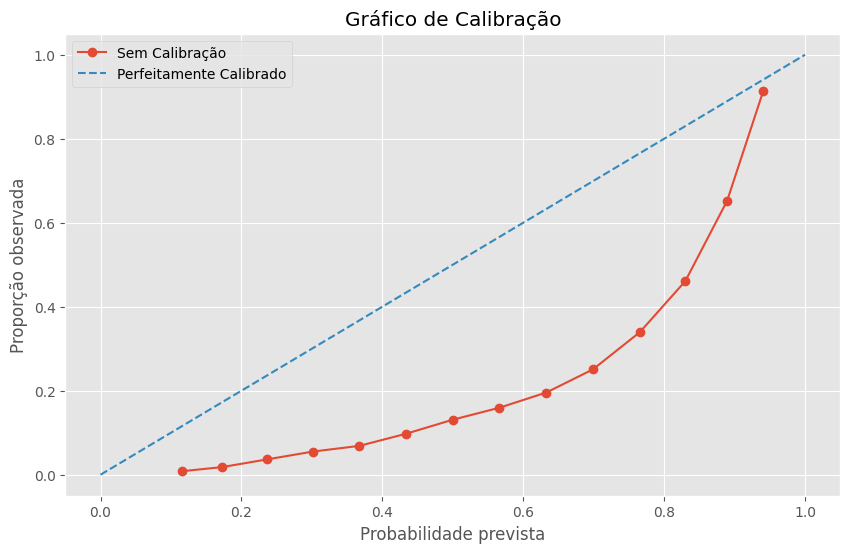

In [18]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

# Funções para métricas adicionais
def calculate_overconfidence_error(y_true, y_pred, bins=10):
    """Calcula o erro de overconfidence."""
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_sums = np.zeros(bins)
    bin_counts = np.zeros(bins)

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_sums[i] = np.sum(y_pred[bin_mask]) - np.sum(y_true[bin_mask])
        bin_counts[i] = np.sum(bin_mask)

    overconfidence_error = np.sum(np.abs(bin_sums) / bin_counts) / bins
    return overconfidence_error

def calculate_ece_mce(y_true, y_pred, bins=10):
    """Calcula o Expected Calibration Error (ECE) e Maximum Calibration Error (MCE)."""
    bin_edges = np.linspace(0, 1, bins + 1)
    ece = 0
    mce = 0

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_true = y_true[bin_mask]
        bin_pred = y_pred[bin_mask]

        if len(bin_true) > 0:
            accuracy = np.mean(bin_true)
            avg_confidence = np.mean(bin_pred)
            bin_error = np.abs(accuracy - avg_confidence)

            ece += bin_error * len(bin_true)
            mce = max(mce, bin_error)

    ece /= len(y_true)
    return ece, mce

def evaluate_metrics(y_true, y_pred, title="Metrics"):
    """Calcula e exibe as métricas."""
    logloss = log_loss(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    brier = brier_score_loss(y_true, y_pred)
    overconfidence = calculate_overconfidence_error(y_true, y_pred)
    ece, mce = calculate_ece_mce(y_true, y_pred)

    print(f"--- {title} ---")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Brier Score: {brier:.4f}")
    print(f"Overconfidence Error: {overconfidence:.4f}")
    print(f"Expected Calibration Error (ECE): {ece:.4f}")
    print(f"Maximum Calibration Error (MCE): {mce:.4f}")
# Prever probabilidades da classe positiva no conjunto de teste
y_pred_proba = model_class.predict(dtest_calib)  # Probabilidades da classe positiva

# Ajustar os parâmetros para XGBClassifier
classifier_params = best_params.copy()
classifier_params['n_estimators'] = num_boost_round  # Número de iterações de boosting

# Configuração do modelo XGBClassifier
model = XGBClassifier(**classifier_params)

# Treinamento do modelo inicial sem calibração
model.fit(X_train_calib, y_train_calib)
y_pred_test_uncalibrated = model.predict_proba(X_test)[:, 1]

# Avaliar métricas antes da calibração
print("\nBefore Calibration")
evaluate_metrics(y_test, y_pred_test_uncalibrated, title="Uncalibrated")

# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=15, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Sem Calibração')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Treinar o modelo base com peso de classes
ratio = y_train_calib.value_counts()[0] / y_train_calib.value_counts()[1]

In [20]:
ratio

4.853710624666311

# Implementando Calibração

In [ ]:
# Validação cruzada na calibração com RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=10, random_state=0)

# Calibração isotônica com validação cruzada
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=4, n_jobs=-1)

# Avaliar o modelo calibrado com cross-validation
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
scores = cross_val_score(calibrated, X_test_calib, y_test_calib, scoring=roc_auc_scorer, cv=cv, n_jobs=-1)

# Exibir resultados de validação cruzada
print(f"Mean ROC AUC (cross-validation): {np.mean(scores):.4f}")
print(f"Standard Deviation ROC AUC (cross-validation): {np.std(scores):.4f}")

# Ajustar o modelo calibrado para avaliação no conjunto de teste
calibrated.fit(X_test_calib, y_test_calib)

# Predições no conjunto de teste após calibração
y_pred_test_calibrated = calibrated.predict_proba(X_test)[:, 1]

# Avaliar métricas após calibração no conjunto de teste
print("\nAfter Calibration")
evaluate_metrics(y_test, y_pred_test_calibrated, title="Calibrated")


## Diagrama de caliabração

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Prever probabilidades da classe positiva no conjunto de teste
y_pred_proba = model_class.predict(dtest_calib)  # Probabilidades da classe positiva


# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=15, strategy='uniform')
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_pred_test_calibrated, n_bins=15, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Antes da Calibração')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Após Regressão Isotônica', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

## Distribuição das probabilidade calibrado e nao calibrado

In [ ]:
# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_pred_test_uncalibrated_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_test_uncalibrated_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred_test_uncalibrated = (y_pred_test_uncalibrated_proba >= 0.5).astype(int)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_pred_test_calibrated_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_test_calibrated_proba = calibrated.predict(X_test)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred_test_calibrated = (y_pred_test_calibrated_proba >= 0.5).astype(int)

# Ajustando as variáveis conforme o dataset fornecido

# Verificar os tamanhos das variáveis
print(f"Tamanho de y_test: {len(y_pred_test_uncalibrated_np)}")
print(f"Tamanho de y_pred_test_uncalibrated_proba: {len(y_pred_test_uncalibrated_proba)}")
print(f"Tamanho de y_pred_test_calibrated_proba: {len(y_pred_test_calibrated_proba)}")

# Garantir que os tamanhos sejam consistentes
if len(y_pred_test_uncalibrated_np) != len(y_pred_test_uncalibrated_proba):
    y_pred_test_uncalibrated_np = y_pred_test_uncalibrated_np[:len(y_pred_test_uncalibrated_proba)]

if len(y_pred_test_uncalibrated_np) != len(y_pred_test_calibrated_proba):
    y_pred_test_calibrated_proba = y_pred_test_calibrated_proba[:len(y_pred_test_uncalibrated_np)]

# Criar DataFrames para as distribuições
data_class_0_uncalibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_uncalibrated_proba[y_pred_test_uncalibrated_np == 0],
    'Class': 'Classe 0 - Não Calibrado'
})

data_class_1_uncalibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_uncalibrated_proba[y_pred_test_uncalibrated_np == 1],
    'Class': 'Classe 1 - Não Calibrado'
})

data_class_0_calibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_calibrated_proba[y_pred_test_uncalibrated_np == 0],
    'Class': 'Classe 0 - Calibrado'
})

data_class_1_calibrated = pd.DataFrame({
    'Predicted Probability': y_pred_test_calibrated_proba[y_pred_test_uncalibrated_np == 1],
    'Class': 'Classe 1 - Calibrado'
})

# Redefinir os índices para evitar conflitos
data_class_0_uncalibrated = data_class_0_uncalibrated.reset_index(drop=True)
data_class_1_uncalibrated = data_class_1_uncalibrated.reset_index(drop=True)
data_class_0_calibrated = data_class_0_calibrated.reset_index(drop=True)
data_class_1_calibrated = data_class_1_calibrated.reset_index(drop=True)

# Gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico para dados não calibrados
sns.histplot(
    data=pd.concat([data_class_0_uncalibrated, data_class_1_uncalibrated]).reset_index(drop=True),
    x='Predicted Probability',
    hue='Class',
    kde=True,
    bins=50,
    palette='tab10',
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title('Distribuição dos Scores Não Calibrados', fontsize=14)
axes[0].set_xlabel('Probabilidade Prevista', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para dados calibrados
sns.histplot(
    data=pd.concat([data_class_0_calibrated, data_class_1_calibrated]).reset_index(drop=True),
    x='Predicted Probability',
    hue='Class',
    kde=True,
    bins=50,
    palette='tab10',
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title('Distribuição dos Scores Calibrados', fontsize=14)
axes[1].set_xlabel('Probabilidade Prevista', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

## Análise após calibração do modelo

In [ ]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef,
    roc_curve, precision_recall_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário

# Gerar previsões probabilísticas para a classe positiva após calibração
y_pred_proba = calibrated.predict_proba(X_test)[:, 1]  # Previsões calibradas (probabilidades)

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_test_np, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo Calibrado (AUC: {roc_auc_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test_np, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Modelo Calibrado (PRAUC: {average_precision_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva de Precisão-Recall', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Cálculos de Métricas
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')

### Shap
(análise do modelo e não do modelo calibrado)

O Shap nos permite compreender o peso de cada variavel para o modelo

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
shap.plots.bar(shap_values, max_display=18)

In [ ]:
pred = model.predict(X_test_calib, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(dtest_calib)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

# make sure the SHAP values add up to marginal predictions
#np.abs(shap_values.sum(axis=1) + explanation.base_values - y_test_calib).max()

#dtest_calib.feature_names

In [ ]:
pred = model.predict(X_test_calib, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(X_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - y_test).max()

# Salvando o Modelo

In [ ]:
# Salvar o modelo
save_pickle(model_class, 'modelo/modelo_xgboost_50_50.pkl')

In [ ]:
calibrated

In [ ]:
# Salvar o modelo
save_pickle(calibrated, 'modelo/modelo_xgboost_calibrated_50_50.pkl')

# Load no modelo

In [ ]:
# Carregar o modelo
modelo_carregado = load_pickle('modelo/modelo_pkl/modelo_classificao_v3.pkl')